# Naive Bayes Theorem - Mobile price

#### Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [11]:
mydata=pd.read_csv("mobile_price.csv")
mydata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Check the datatypes:

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Check the null values:

In [4]:
mydata.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Statistical Summary 

In [5]:
mydata.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Correlation:

In [7]:
mydata_corr = mydata.corr()
mydata_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


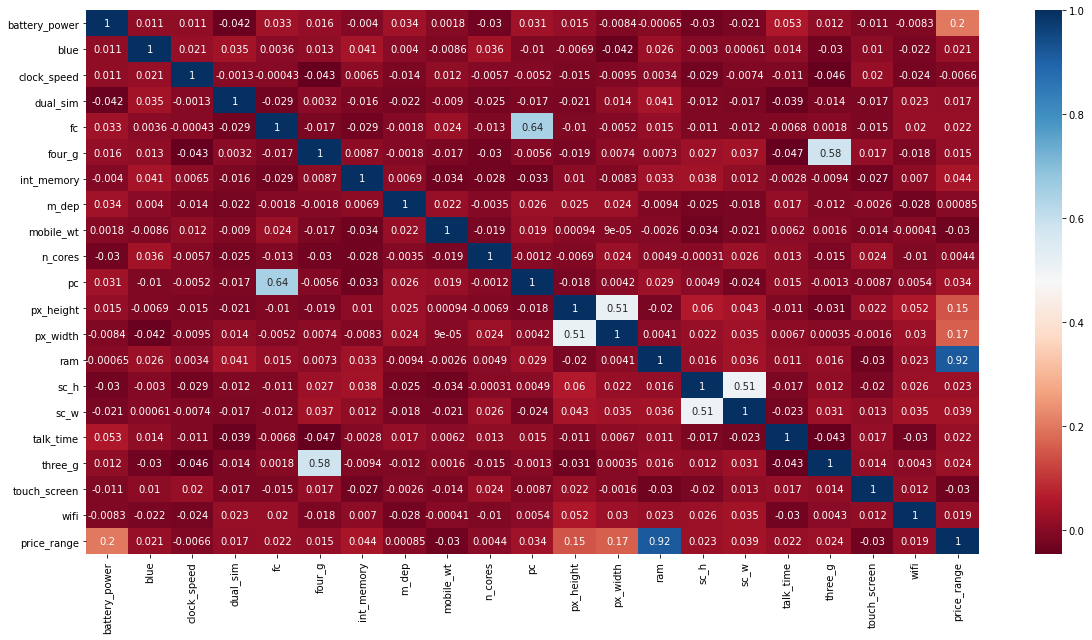

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(mydata_corr,annot = True, cmap = "RdBu")

### Boxplot:

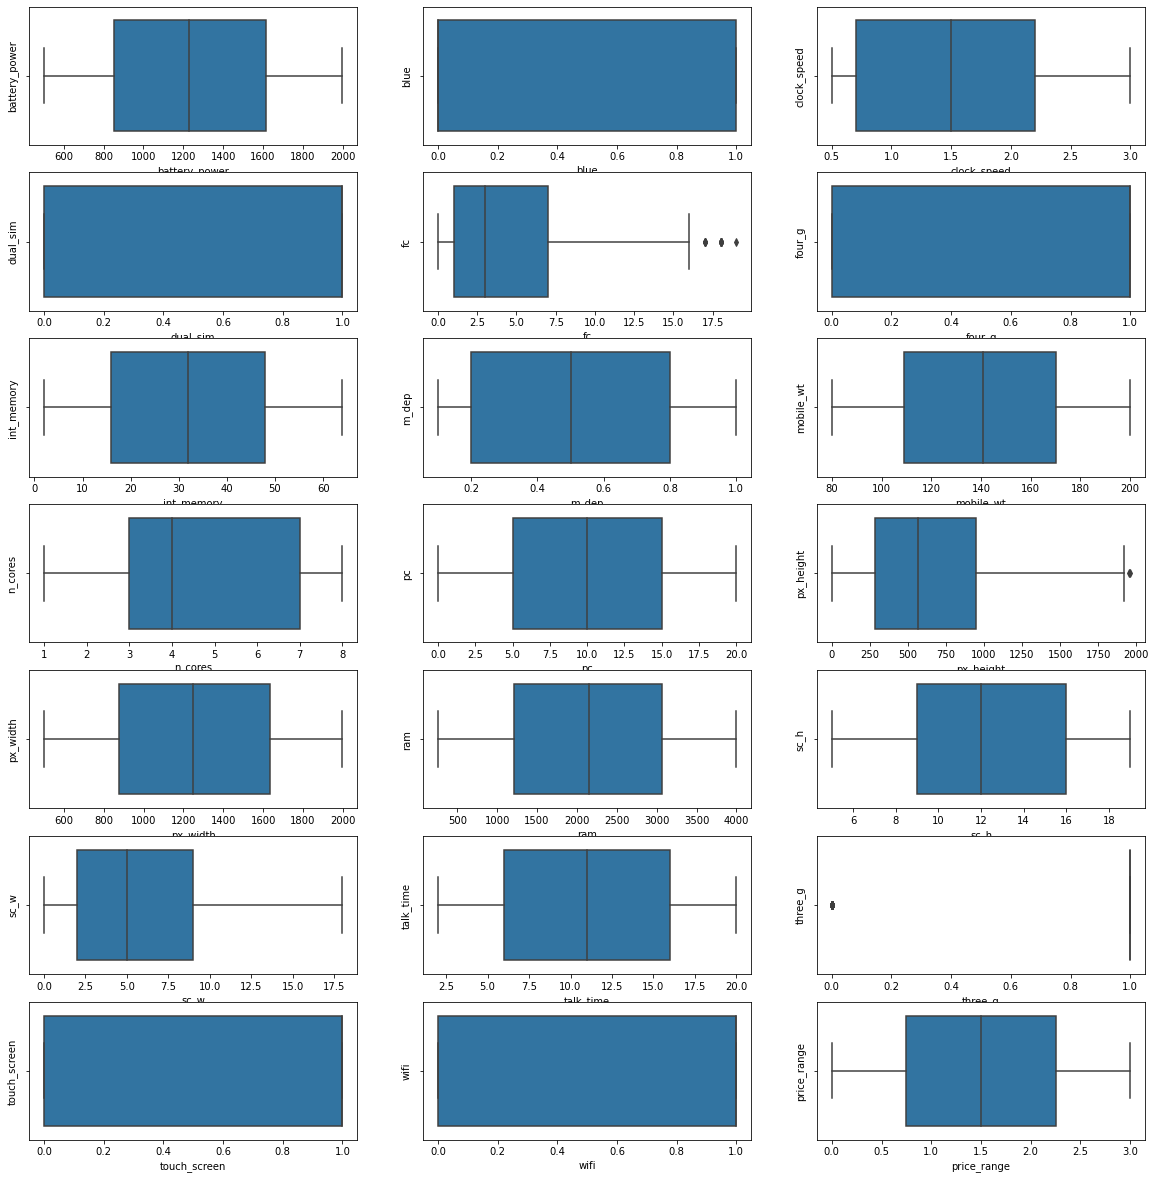

In [14]:
plt.figure(figsize=(20,30))
for i,col in enumerate(mydata,1):
    plt.subplot(10,3,i)
    sns.boxplot(mydata[col])
    plt.ylabel(col)
plt.show()

### Independent and dependent variable

In [15]:
x_ind = mydata.drop('price_range',axis =1 )

In [16]:
y_dep = mydata['price_range']

### Train an Test data

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,train_size=0.8,random_state=2)

### Gaussian NB 
Naive Bayes models are a group of high-speed and simple classification algorithms Often suitable for very high-dimensional datasets Built on Bayesian classification methods.They are fast and have very few tunable parameters

In [20]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

### Prediction:

In [22]:
y_pred=model.predict(x_test)
y_pred

array([0, 2, 1, 2, 3, 1, 3, 3, 1, 2, 1, 0, 1, 3, 0, 3, 2, 1, 1, 3, 1, 2,
       0, 2, 3, 2, 1, 0, 0, 1, 0, 3, 0, 1, 1, 0, 3, 0, 3, 2, 1, 1, 3, 3,
       2, 0, 3, 2, 0, 3, 1, 3, 3, 2, 3, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 0, 0, 3, 1, 0, 0, 2, 0, 2, 2, 3, 3, 2, 3, 2, 2, 0, 0, 3, 2, 2,
       0, 1, 1, 2, 0, 0, 1, 2, 0, 3, 2, 0, 1, 3, 1, 1, 2, 3, 3, 3, 2, 1,
       3, 1, 0, 1, 3, 0, 0, 1, 1, 1, 0, 3, 2, 0, 3, 0, 3, 1, 0, 0, 1, 3,
       2, 0, 0, 3, 3, 0, 2, 0, 2, 3, 3, 0, 2, 2, 1, 3, 0, 1, 2, 3, 1, 3,
       0, 3, 0, 2, 0, 1, 1, 0, 3, 0, 0, 3, 2, 3, 1, 0, 2, 1, 0, 3, 0, 1,
       1, 1, 3, 3, 1, 2, 1, 1, 1, 0, 0, 1, 3, 2, 1, 0, 1, 1, 3, 2, 0, 1,
       3, 1, 0, 3, 3, 0, 3, 2, 2, 2, 2, 3, 3, 3, 1, 0, 3, 1, 0, 2, 3, 0,
       0, 3, 0, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 0, 3, 0, 1, 2, 0, 3, 2, 2,
       2, 0, 2, 3, 0, 3, 0, 1, 1, 0, 1, 3, 1, 1, 0, 3, 3, 0, 0, 0, 3, 3,
       0, 3, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 3, 3, 0, 3, 2, 2,
       1, 2, 1, 3, 0, 0, 3, 1, 3, 1, 2, 0, 1, 0, 3,

### Performance Measures:

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test)

array([[94, 16,  0,  0],
       [ 4, 80, 17,  0],
       [ 0, 13, 67,  4],
       [ 0,  0, 10, 95]])

### accuracy_score

In [25]:
accuracy_score(y_pred,y_test)

0.84

# Conclusion:
   Thus by using Guassian Naive Bayes algorithm we got our accuracy of 84%.Since our variables in dataset in high, we have used Guassian NB algorithm.We pricted the price range of the mobile and classified into groups.The values predicted is 84%. So we can predict the new mobile price range based on the specification.    